In [1]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where
import itertools # construct specialized tools
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
# Importing and cleaning the data
train_data = pd.read_csv('DBS.csv', sep=';')
test_data = pd.read_csv('DBS_2020.csv', sep=';')
train_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57.00,A,19,91.54,A,40.0,189.92,A,1,2019,2019/2020
1,985,42.87,B,19,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.50,A,16,96.79,A,40.0,188.91,A,1,2019,2019/2020
3,998,54.50,A,16,93.36,A,40.0,186.85,A,1,2019,2019/2020
4,1347,55.00,A,16,92.86,A,39.0,186.38,A,1,2019,2019/2020


In [4]:
X_train = np.asarray(train_data[['access', 'tests', 'assignments']])
y_train = np.asarray(train_data['graduate'])

In [5]:
X_test = np.asarray(test_data[['access', 'tests', 'assignments']])
y_test = np.asarray(test_data['graduate'])

In [6]:
standardizer = StandardScaler()

In [7]:
# Modelling
from sklearn.model_selection import GridSearchCV
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [8]:
# Evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=4)
scores = cross_val_score(clf, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.951


In [9]:
# Transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [10]:
# Summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({1: 210, 0: 210})


In [11]:
#Evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(clf, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.941


In [12]:
# Predictions
yhat = clf.predict(X_test)
yhat_prob = clf.predict_proba(X_test)

In [13]:
# Classificaton report
from sklearn.metrics import classification_report # evaluation metric
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.94      0.98      0.96        46

    accuracy                           0.93        60
   macro avg       0.93      0.88      0.90        60
weighted avg       0.93      0.93      0.93        60



In [14]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, yhat))

Accuracy: 0.9333333333333333


In [15]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)
print(cm)

[[11  3]
 [ 1 45]]


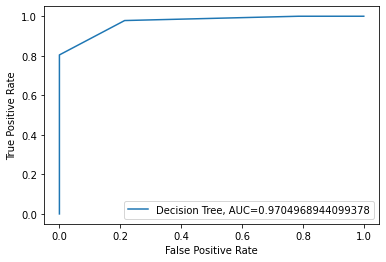

In [17]:
# Import the metrics class
from sklearn import metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [18]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - graphviz


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.9.2-py38haa244fe~ --> pkgs/main::conda-4.9.2-py38haa95532_0


Note: you may need to restart the kernel to use updated packages.
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done



In [19]:
conda install -c conda-forge pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be SUPERSEDED by a higher-priority channel:

  conda               pkgs/main::conda-4.9.2-py38haa95532_0 --> conda-forge::conda-4.9.2-py38haa244fe_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install six

Note: you may need to restart the kernel to use updated packages.


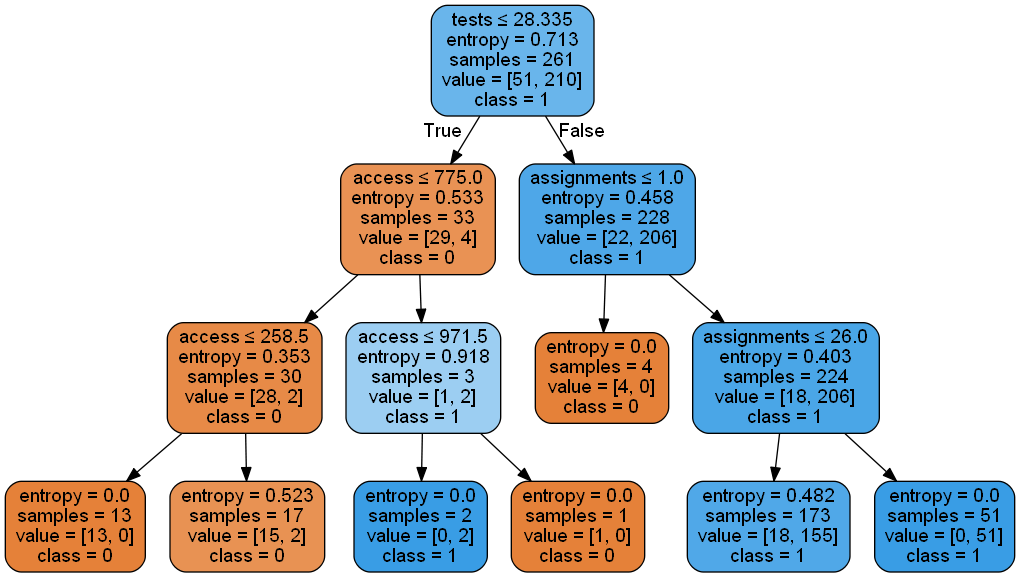

In [21]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = ['access', 'tests', 'assignments'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())